# Ridge linear regression example

**Example using the Ridge linear regression function in the stepAIC package**

The **ridge** function in the stepAIC package provides output of regression models and summary statistics using the following three methods from the sklearn.linear_model package:

- RidgeCV: Ridge regression with default cross-validation using the MSE as the scoring criterion to select alpha
- Ridge_AIC: Ridge regression using AIC as the scoring criterion to select alpha by trial
- Ridge_BIC: Ridge regression using BIC as the scoring criterion to select alpha by trial

#### Limitations of Ridge regression for feature selection and the utility of AIC and BIC

Unlike Lasso regression, Ridge regression does not have zeroing of selected coefficients as a goal. Therefore, Ridge regression generally does not select a subset of features for the final best model. Instead, Ridge regression retains all of the candiate features in the input data set and has the goal of minimizing the coefficient values as a strategy to reduce the variance inflation factors to mitigate the effects of multicollinearity.

AIC and BIC have limited value in optimizing Ridge regression. The AIC and BIC in Ridge regression is not sensitive to the alpha parameter because the AIC and BIC values are strongly affected by the number of model parameters. As the alpha parameter is adjusted, the AIC and BIC values change by a relatively small amount depending on the variance of the residuals at each value of alpha. This means that the AIC and BIC values across a wide range of alpha values do not penalize the model for having too many parameters in Ridge regression. Using AIC and BIC have the effect of choosing the lowest value of alpha, which is similar to performing ordinary linear regression without regularaization and with no mitigation of multicollinearity.

If feature selection is the goal of the analysis, then Stepwise or Lasso regression methods are generally better than Ridge regression for that purpose. If your analysis requires that all candidate features are retained in the final model, then Ridge regression is ideal for that purpose.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the stepAIC package in your environment, if it is not already installed, using one of the following lines in the next cell:

In [7]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

In this example we will use the diabetes data set from sklearn

In [8]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Next, we will use the **ridge** function in stepAIC to fit the Ridge regression models and display the summary statistics of the regression results for the best fit models, as well as the best-fit coefficients of each model.

Fitting Ridge regression models, please wait ...


Ridge regression statistics of best models in model_outputs['stats']:


| Statistic          |         RidgeCV |       Ridge_AIC |       Ridge_BIC |
|:-------------------|----------------:|----------------:|----------------:|
| alpha              |     1.81242     |     1e-06       |     1e-06       |
| r-squared          |     0.517348    |     0.517748    |     0.517748    |
| adjusted r-squared |     0.505001    |     0.505412    |     0.505412    |
| nobs               |   442           |   442           |   442           |
| df residuals       |   431           |   431           |   431           |
| df model           |    10           |    10           |    10           |
| F-statistic        |    46.1983      |    46.2724      |    46.2724      |
| Prob (F-statistic) |     1.11022e-16 |     1.11022e-16 |     1.11022e-16 |
| RMSE               |    53.4983      |    53.4761      |    53.4761      |
| Log-Likelihood     | -2386.1

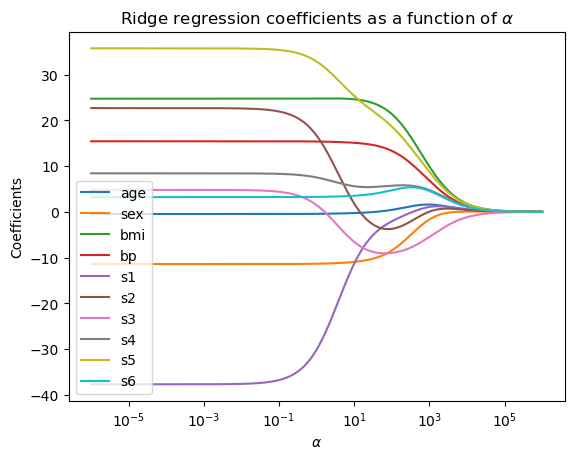

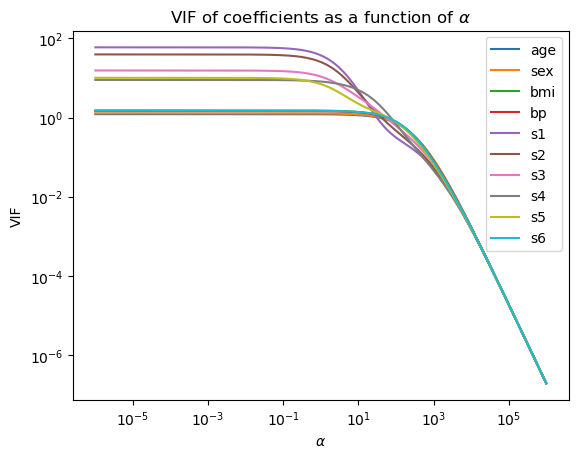

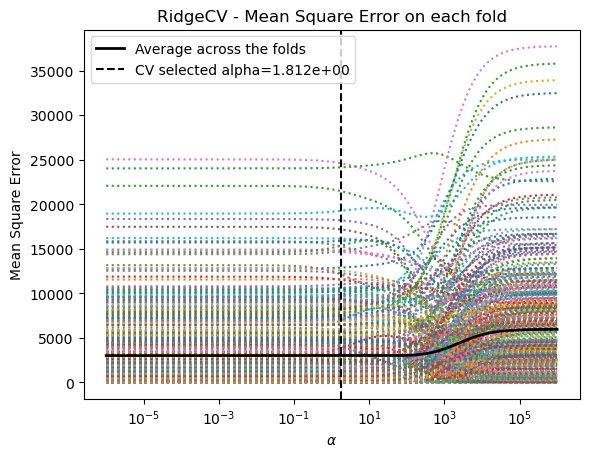

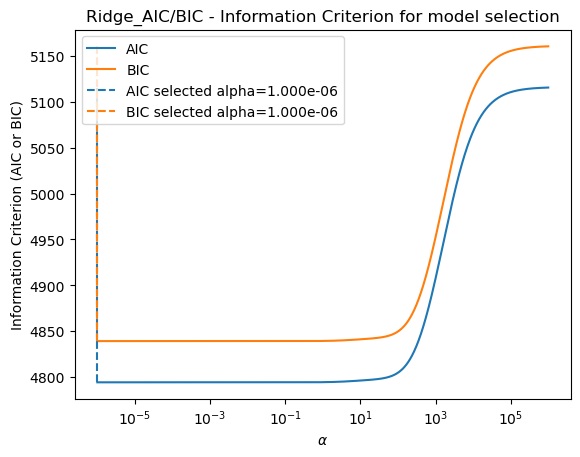

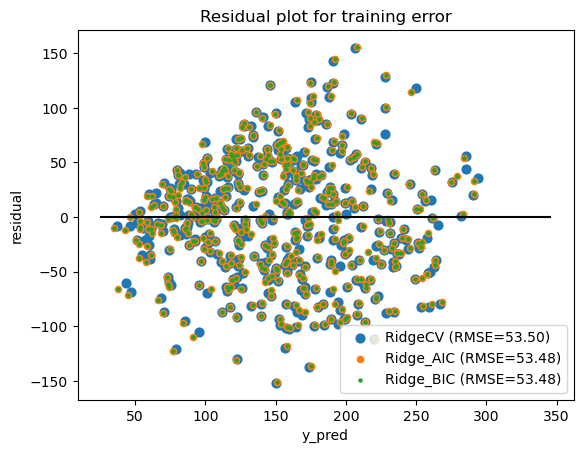

In [9]:
from stepAIC import ridge

model_objects, model_outputs = ridge(X, y)

Note that the VIF results using RidgeCV show substantially reduced multicollinearity (2 features with VIF>10) compared with results of Ridge_AIC and Ridge_BIC (4 features with VIF>10). However, the multicollinearity for all methods is excessive. Using AIC and BIC to optimize the ridge regression is especially problematic. This is because AIC and BIC have limited value in optimizing Ridge regression. The lowest AIC and BIC values occur at the lowest vales of alpha, which is similar to performing ordinary linear regression with no regularization and no reduction in VIF. The AIC and BIC in Ridge regression is not sensitive to the alpha parameter because the AIC and BIC values are strongly affected by the number of model parameters. As the alpha parameter is adjusted, the AIC and BIC values change by a relatively small amount depending on the variance of the residuals at each value of alpha. This means that the AIC and BIC values across a wide range of alpha values do not penalize the model for having too many parameters in Ridge regression.